# Predicting Tesla Inc. (TSLA) stock prices using historical data

## Introduction
Stock price prediction is a challenging task due to the inherently volatile and non-linear nature of financial markets. This project focuses on predicting Tesla Inc. (TSLA) stock prices using historical data obtained from Yahoo Finance. By leveraging time series forecasting techniques and machine learning models, we aim to capture trends and patterns that can assist in future price estimation. The dataset includes features such as historical closing prices, lagged values, and technical indicators like moving averages. We employ and compare the performance of three models—Linear Regression, Decision Tree Regressor, and Random Forest Regressor—using a time-based 80/20 train-test split. Model performance is evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the Coefficient of Determination (R²). Additionally, feature importance analysis helps us understand which inputs contribute most to the predictive power of our models.

In [1]:
pip install yfinance scikit-learn matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd

In [3]:
# Download TSLA data from Yahoo Finance
tsla_data = yf.download('TSLA', start='2015-01-01', end='2024-12-31')

C:\Users\arpit\AppData\Local\Temp\ipykernel_18892\700946934.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla_data = yf.download('TSLA', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [4]:
tsla_data.reset_index(inplace=True)

In [5]:
tsla_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


#### Feature Engineering (Lag Features & Technical Indicators)

In [6]:
# Lag Features
tsla_data['Close_Lag1'] = tsla_data['Close'].shift(1)
tsla_data['Close_Lag2'] = tsla_data['Close'].shift(2)

In [7]:
# Technical Indicators: Moving Averages
tsla_data['MA7'] = tsla_data['Close'].rolling(window=7).mean()
tsla_data['MA21'] = tsla_data['Close'].rolling(window=21).mean()

In [8]:
# Drop rows with NaNs (due to lagging and rolling)
tsla_data.dropna(inplace=True)

In [9]:
# Set target
tsla_data['Target'] = tsla_data['Close']

#### Train-Test Split (Time-Based 80/20)

In [10]:
# Time-based split
train_size = int(len(tsla_data) * 0.8)
train = tsla_data[:train_size]
test = tsla_data[train_size:]

In [11]:
# Features and Target
features = ['Close_Lag1', 'Close_Lag2', 'MA7', 'MA21']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

#### Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [13]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [14]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

In [15]:
print("Linear Regression Performance:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

Linear Regression Performance:
MAE: 5.89, MSE: 69.49, RMSE: 8.34, R²: 0.9792


#### Decision Tree Regressor

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [17]:
# Hyperparameter Tuning
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
tree = DecisionTreeRegressor(random_state=42)
grid_tree = GridSearchCV(tree, param_grid, cv=3)
grid_tree.fit(X_train, y_train)
y_pred_tree = grid_tree.predict(X_test)

In [18]:
# Evaluation
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [19]:
print("Decision Tree Performance:")
print(f"MAE: {mae_tree:.2f}, MSE: {mse_tree:.2f}, RMSE: {rmse_tree:.2f}, R²: {r2_tree:.4f}")

Decision Tree Performance:
MAE: 8.81, MSE: 161.56, RMSE: 12.71, R²: 0.9516


#### Random Forest Regressor + Feature Importance

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
# Hyperparameter tuning
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

In [22]:
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_rf, cv=3)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)

In [23]:
# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [24]:
print("Random Forest Performance:")
print(f"MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}")

Random Forest Performance:
MAE: 7.57, MSE: 148.55, RMSE: 12.19, R²: 0.9555


In [25]:
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
feature_importance = grid_rf.best_estimator_.feature_importances_
features_sorted = pd.Series(feature_importance, index=features).sort_values(ascending=False)

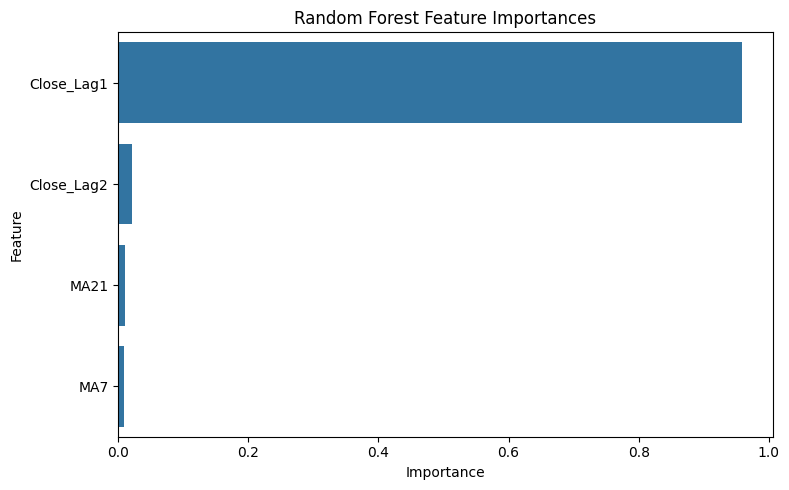

In [27]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=features_sorted.values, y=features_sorted.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Conclusion
In this study, we successfully developed predictive models for TSLA stock prices using time-series historical data enriched with lag features and technical indicators. Among the models tested, the Random Forest Regressor demonstrated superior performance, yielding lower error rates and higher R² compared to Linear Regression and Decision Tree models. This suggests that ensemble methods can effectively capture complex, non-linear patterns in stock price movements. Furthermore, the feature importance analysis provided valuable insights into which lag and technical indicators most influence price prediction. Overall, this project showcases the practical application of machine learning in financial forecasting and lays the groundwork for building more robust and scalable trading decision systems in the future.